In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%history -g -f SterileNu

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.patches as patches

In [4]:
plt.rc('font', size=14)

In [5]:
IC_limit = np.loadtxt("Limits/IceCube2024.txt", delimiter=",").T
M_limit = np.loadtxt("Limits/MINOS2020.txt", delimiter=",").T
M_limit[0, :] *= 4
SBN_proj = np.loadtxt("Limits/SBNProj.txt", delimiter=",").T

In [6]:
IC_limit

array([[5.38800e-01, 5.36000e-01, 5.33100e-01, ..., 2.91700e-01,
        2.91700e-01, 2.93300e-01],
       [1.67000e-02, 1.67000e-02, 1.67000e-02, ..., 9.52140e+01,
        9.59954e+01, 9.67833e+01]], shape=(2, 2388))

In [7]:
IC = np.loadtxt("sterilenu_uu_fix_1pp_IC_100.txt").T
KM3 = np.loadtxt("sterilenu_uu_fix_1pp_KM3_100.txt").T
PONE = np.loadtxt("sterilenu_uu_fix_1pp_PONE_100.txt").T

In [14]:
IC_uncorr = np.loadtxt("sterilenu_uu_fix_1pp_uncorr_IC_100.txt").T
KM3_uncorr = np.loadtxt("sterilenu_uu_fix_1pp_uncorr_KM3_100.txt").T
PONE_uncorr = np.loadtxt("sterilenu_uu_fix_1pp_uncorr_PONE_100.txt").T

In [15]:
colors = ["#6fbbd6", "#b8598d", "#eb1521"]

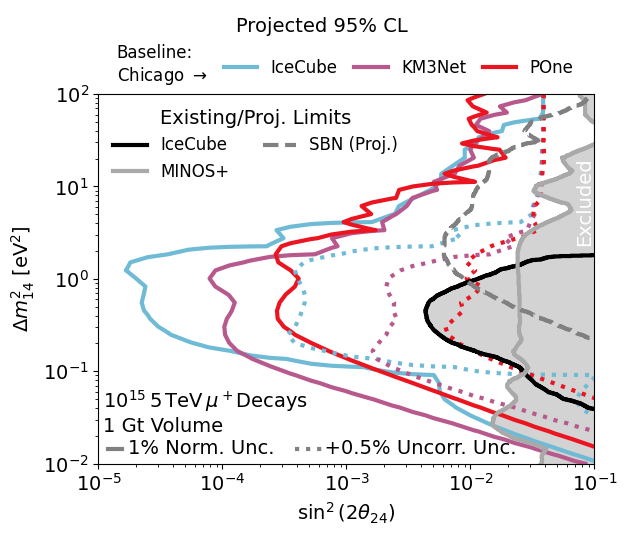

In [16]:
p1 = plt.plot(IC[0], IC[1], linewidth=3, color=colors[0])[0]
p2 = plt.plot(KM3[0], KM3[1], linewidth=3, color=colors[1])[0]
p3 = plt.plot(PONE[0], PONE[1], linewidth=3, color=colors[2])[0]

p0 = plt.plot([], [], color="white")[0]


plt.plot(IC_uncorr[0], IC_uncorr[1], linewidth=3, color=colors[0], linestyle=":")[0]
plt.plot(KM3_uncorr[0], KM3_uncorr[1], linewidth=3, color=colors[1], linestyle=":")[0]
plt.plot(PONE_uncorr[0], PONE_uncorr[1], linewidth=3, color=colors[2], linestyle=":")[0]

xlim = plt.xlim()
ylim = plt.ylim()

l1 = plt.plot(IC_limit[0], IC_limit[1], linewidth=3, color="black", label="IceCube")[0]
l2 = plt.plot(M_limit[0], M_limit[1], linewidth=3, color="darkgray", label="MINOS+")[0]
l3 = plt.plot(SBN_proj[0], SBN_proj[1], linewidth=3, linestyle="--", color="gray", label="SBN (Proj.)")[0]

legendA = plt.legend([l1, l2, l3], ["IceCube", "MINOS+", "SBN (Proj.)"], fontsize=12, loc="upper left", frameon=False,
                    title="Existing/Proj. Limits", ncol=2)

legendB = plt.legend([p0, p1, p2, p3], ["Baseline:\nChicago $\\to$", "IceCube", "KM3Net", "POne"], 
           ncol=4, fontsize=12, columnspacing=1, frameon=False, title="Projected 95% CL",
          loc='upper center', bbox_to_anchor=(0.45, 1.25))

plt.gca().add_artist(legendA)

plt.fill_betweenx(M_limit[1], M_limit[0], 1e-1, color="lightgray")
plt.fill_betweenx(IC_limit[1], IC_limit[0], 1e-1, color="lightgray")

plt.text(0.01, 0.025,
         "$10^{15}\\,5\\,\\mathrm{TeV}\\,\\mu^+$Decays\n1 Gt Volume\n    1% Norm. Unc.        +0.5% Uncorr. Unc.",
        transform=plt.gca().transAxes)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\\sin^2(2\\theta_{24})$")
plt.ylabel("$\\Delta m^2_{14}$ [eV$^2$]")

plt.text(0.96, 0.6, "Excluded", transform=plt.gca().transAxes, rotation=90, color="white")

plt.plot([1.2*1e-5, 1.2*1e-5*1.3], [1.45e-2, 1.45e-2], color="gray", linewidth=3)
plt.plot([1.2*1e-5*32, 1.2*1e-5*1.8*32], [1.45e-2, 1.45e-2], color="gray", linewidth=3, linestyle=":")

plt.xlim([1e-5, 1e-1])
plt.ylim([1e-2, 100])

plt.savefig("sterilenu_sensitivity.pdf", bbox_inches="tight")
plt.savefig("sterilenu_sensitivity.png", bbox_inches="tight")

In [10]:
DPdepth = np.genfromtxt("DensityProfileDepthAK135.txt")
DPdensity = np.genfromtxt("DensityProfileDensityAK135.txt")
R_earth = DPdepth.max()

R_earth

np.float64(6371.0)

In [11]:
# layers of earth
upper_mantle_depth = 670 # km
lower_mantle_depth = 2900
outer_core_depth = 2900
inner_core_depth = 6370

In [12]:
Rset = 8000
x = np.linspace(-Rset, Rset, 1000)
y = np.linspace(-Rset, Rset, 1000)


X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
R = R_earth - R
D = np.interp(R, DPdepth, DPdensity)
D[R < 0] = 0

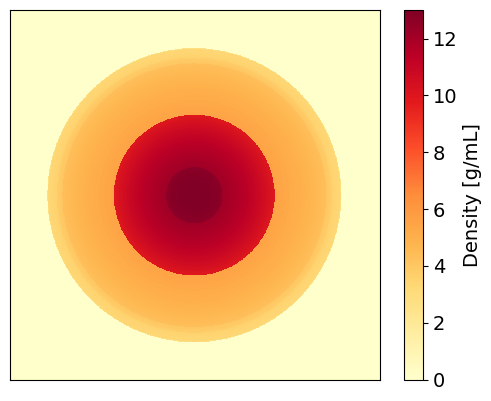

In [13]:
plt.pcolor(X, Y, D, shading="nearest", cmap="YlOrRd")

c = plt.colorbar()
c.set_label("Density [g/mL]")
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal')

131.88
-67.99253910481164
11.711558840737634


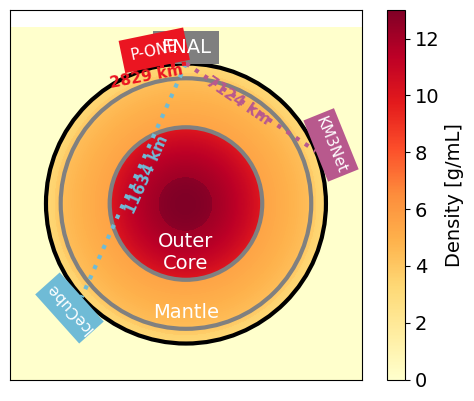

In [16]:
plt.pcolor(X, Y, D, shading="nearest", cmap="YlOrRd")

c = plt.colorbar()
c.set_label("Density [g/mL]")
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal')

circle = patches.Circle((0, 0), R_earth-outer_core_depth, edgecolor='gray', facecolor='none', linewidth=3)
plt.gca().add_patch(circle)
plt.text(0, -(R_earth-outer_core_depth) + 300, "Outer\nCore", horizontalalignment="center", verticalalignment="bottom", color="white")

circle = patches.Circle((0, 0), R_earth-upper_mantle_depth, edgecolor='gray', facecolor='none', linewidth=3)
plt.gca().add_patch(circle)
plt.text(0, -(R_earth-upper_mantle_depth) + 300, "Mantle", horizontalalignment="center", verticalalignment="bottom", color="white")

circle = patches.Circle((0, 0), R_earth, edgecolor='black', facecolor='none', linewidth=3)
plt.gca().add_patch(circle)

ANGLE = 0
rect = patches.Rectangle((-1500, R_earth), 3000, 1500, linewidth=1, facecolor='tab:gray')
t2 = mpl.transforms.Affine2D().rotate_deg(ANGLE) + plt.gca().transData
rect.set_transform(t2)
plt.gca().add_patch(rect)
text = plt.text(0, R_earth + 750, "FNAL", horizontalalignment="center", verticalalignment="center", color="white",
                rotation=ANGLE)
text.set_transform(t2)

# IceCube
ANGLE = 90 + 41.88
print(ANGLE)
rect = patches.Rectangle((-1500, R_earth), 3000, 1500, linewidth=1, facecolor=colors[0])
t2 = mpl.transforms.Affine2D().rotate_deg(ANGLE) + plt.gca().transData
rect.set_transform(t2)
plt.gca().add_patch(rect)
text = plt.text(0, R_earth + 750, "IceCube", horizontalalignment="center", verticalalignment="center", color="white",
                fontsize=11, rotation=ANGLE)
text.set_transform(t2)
rotMatrix = np.array([[np.cos(ANGLE*np.pi/180), -np.sin(ANGLE*np.pi/180)], 
                         [np.sin(ANGLE*np.pi/180),  np.cos(ANGLE*np.pi/180)]])
xy0 = np.array([0, R_earth])
xy1 = np.dot(rotMatrix, np.array([0, R_earth]))
plt.plot([xy0[0], xy1[0]], [xy0[1], xy1[1]], color=colors[0], linestyle=":", linewidth=3)

plt.text(0.32, 0.45, "%i km" % int(11634), color=colors[0], 
         transform=plt.gca().transAxes, rotation=ANGLE/2, fontsize=11, weight="bold")


# KM3Net
ANGLE = -2*np.arcsin(4427*1.60934/(2*R_earth)) * 180 / np.pi
print(ANGLE)

rect = patches.Rectangle((-1500, R_earth), 3000, 1500, linewidth=1, facecolor=colors[1])
t2 = mpl.transforms.Affine2D().rotate_deg(ANGLE) + plt.gca().transData
rect.set_transform(t2)
plt.gca().add_patch(rect)
text = plt.text(0, R_earth + 750, "KM3Net", horizontalalignment="center", verticalalignment="center", color="white",
                fontsize=11, rotation=ANGLE)
text.set_transform(t2)
rotMatrix = np.array([[np.cos(ANGLE*np.pi/180), -np.sin(ANGLE*np.pi/180)], 
                         [np.sin(ANGLE*np.pi/180),  np.cos(ANGLE*np.pi/180)]])
xy0 = np.array([0, R_earth])
xy1 = np.dot(rotMatrix, np.array([0, R_earth]))
plt.plot([xy0[0], xy1[0]], [xy0[1], xy1[1]], color=colors[1], linestyle=":", linewidth=3)
plt.text(0.55, 0.69, "%i km" % int(4427*1.60934), color=colors[1], 
         transform=plt.gca().transAxes, rotation=ANGLE/2, fontsize=11, weight="bold")

# PONE
ANGLE = 2*np.arcsin(1758*1.60934/(2*R_earth)) * 180 / np.pi
ANGLE = 2*np.arcsin(1300/(2*R_earth)) * 180 / np.pi
print(ANGLE)

rect = patches.Rectangle((-1500, R_earth), 3000, 1500, linewidth=1, facecolor=colors[2])
t2 = mpl.transforms.Affine2D().rotate_deg(ANGLE) + plt.gca().transData
rect.set_transform(t2)
plt.gca().add_patch(rect)
text = plt.text(0, R_earth + 750, "P-ONE", horizontalalignment="center", verticalalignment="center", color="white",
                fontsize=11, rotation=ANGLE)
text.set_transform(t2)
rotMatrix = np.array([[np.cos(ANGLE*np.pi/180), -np.sin(ANGLE*np.pi/180)], 
                         [np.sin(ANGLE*np.pi/180),  np.cos(ANGLE*np.pi/180)]])
xy0 = np.array([0, R_earth])
xy1 = np.dot(rotMatrix, np.array([0, R_earth]))
plt.plot([xy0[0], xy1[0]], [xy0[1], xy1[1]], color=colors[2], linestyle=":", linewidth=3)
plt.text(0.28, 0.79, "%i km" % int(1758*1.60934), color=colors[2], 
         transform=plt.gca().transAxes, rotation=ANGLE/2 + 5, fontsize=11, weight="bold")



plt.savefig("kaleidoscope.pdf", bbox_inches="tight")
plt.savefig("kaleidoscope.png", bbox_inches="tight")

In [15]:
ICECUBE_BASELINE = np.sqrt(2*R_earth**2*(1 - np.cos((90+lat)*np.pi/180))) # meters
ICECUBE_BASELINE

NameError: name 'lat' is not defined